In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-detection/spam.csv


In [2]:
# Name: Aarya Nitin Shirke
# Spam SMS Detection (Task-4)

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/kaggle/input/spam-detection/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape


(5572, 5)

In [6]:
#1 Data Cleaning
#2 EDA
#3 Text Preprocessing
#4 Model building
#5 Evaluation
#6 Improvement

# **Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop the 3 columns 
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Renaming Columns
df = df.rename({'v1': 'target', 'v2': 'text'}, axis =1)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
def le(col):
    labelencoder = LabelEncoder()
    col = labelencoder.fit_transform(col)
    return col
df['target'] = le(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing Values
df.isna().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

# **Data Preprocessing**

In [14]:
# to convert text into lower case 
txt = 'HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%'
txt = txt.lower()
txt

'hello how are you priyanshu? hope you doing fine! i like to do machine learning%'

In [15]:
#Tokeniztion divides sentence into list
txt = nltk.word_tokenize(txt)
txt

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 '?',
 'hope',
 'you',
 'doing',
 'fine',
 '!',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning',
 '%']

In [16]:
## removing Special Characters this keeps only the alphabets and numeric 
x = []
for i in txt:
    if i.isalnum():
        x.append(i)
x

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 'hope',
 'you',
 'doing',
 'fine',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning']

In [17]:
# remove stopwords and punctuation:
txt = x[:]  #so list are immutable 
x.clear()
for i in txt:
    if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machine', 'learning']

In [18]:
#Stemming makes dancer, dancing to danc
txt = x[:]
x.clear()
for i in txt:
    ps = PorterStemmer()
    i = ps.stem(i)
    x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machin', 'learn']

In [19]:
#Lets Create the Function
def tranform_text(text):
    text = text.lower()  #lower case
    text = nltk.word_tokenize(text)  # tokenization
    
    # removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # remove stopwords and punctuation:
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))
    return " ".join(y)

In [20]:
tranform_text('HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%')

'hello priyanshu hope fine like machin learn'

In [21]:
df['tranformed_text'] = df['text'].apply(tranform_text)
df.head()

,target,text,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


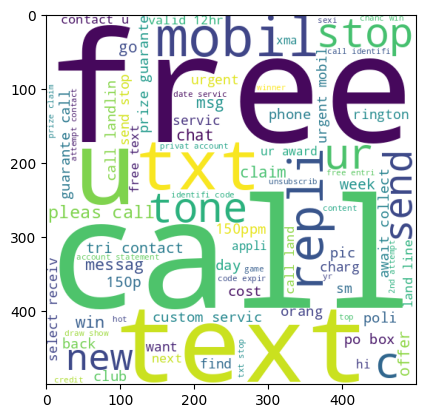

In [22]:
# Word cloud of spam messages it shows the important words in text
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud = wc.generate(df[df['target'] ==1]['tranformed_text'].str.cat(sep=" "))
plt.imshow(spam_wordcloud)

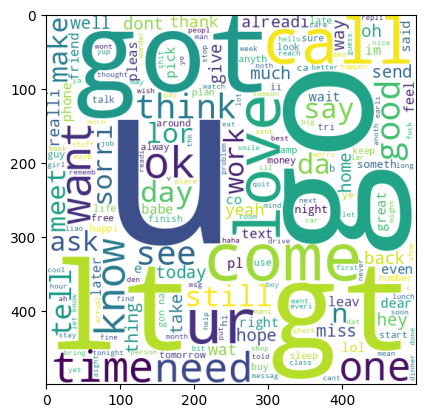

In [23]:
# Word cloud of ham messages it shows the important words in text
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
ham_wordcloud = wc.generate(df[df['target'] ==0]['tranformed_text'].str.cat(sep=" "))
plt.imshow(ham_wordcloud)

In [24]:
#lets get top 30 words in sapm messages
spam_corpus = []
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9883

In [25]:
#this are top 30 words in spam
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
df_spam

,Word,Frequency
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


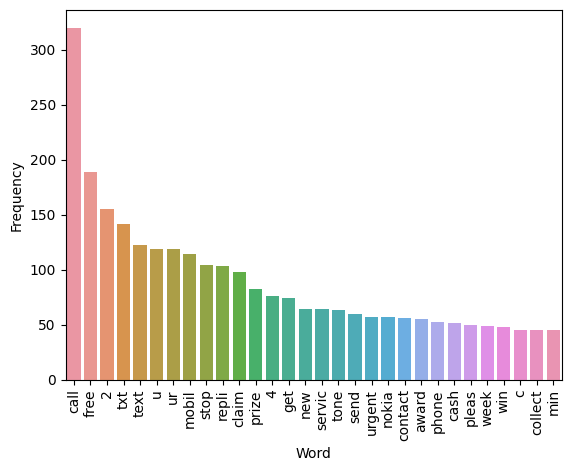

In [26]:
sns.barplot(x='Word', y='Frequency', data=df_spam)
plt.xticks(rotation = 'vertical')
plt.show()

In [27]:
#lets get top 30 words in ham messages now
ham_corpus = []
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

34771

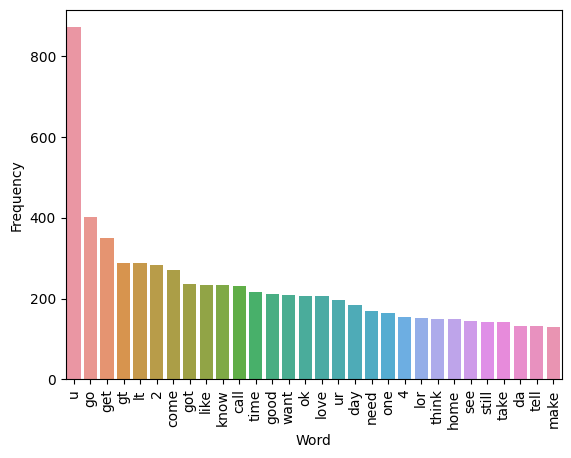

In [28]:
#this are top 30 words in ham
from collections import Counter
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_ham)
plt.xticks(rotation = 'vertical')
plt.show()

# **Make Pipeline**

In [29]:
#Data Preprocessing ---> Vectorization(tfidf with max features 3000) ----> model(multinomial navie bayes)
df


,target,text,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [30]:
X = df['tranformed_text']
y = df['target']

In [31]:
def predict(X_pred):
    X_pred = tranform_text(X_pred)
    X_pred = [X_pred] 
    X_tf = tfidf.transform(X_pred).toarray()  # Use transform instead of fit_transform
    predictions = mnb.predict(X_tf)
    if predictions == 1:
        print("The Message is Spam")
    else:
        print("The Message is not spam")

Spam Message
